In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
mean1, cov1 = [1,0], [[1.5,2],[1,2]]
mean2, cov2 = [4,6], [[2.5,-1.5],[-1.5,2]]
mean3, cov3 = [9,8], [[2,1.5],[-1,0.5]]

In [3]:
data1 = np.random.multivariate_normal(mean1,cov1,200)
data2 = np.random.multivariate_normal(mean2,cov3,200)
data3 = np.random.multivariate_normal(mean3,cov3,200)

X = np.vstack([data1, data2, data3]) #vertically stacking the data

C:\Users\AASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.
C:\Users\AASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
C:\Users\AASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
X

array([[ 7.23227989,  7.06112622],
       [ 1.77789923,  0.43507602],
       [10.6130474 ,  9.09704901],
       ...,
       [ 5.104583  ,  6.8077753 ],
       [ 0.23124485, -0.48466211],
       [15.3277245 ,  9.01423583]])

In [92]:
X.shape

(600, 2)

In [4]:
np.random.shuffle(X)

array([2.05332442, 1.22326829])

In [96]:
def kMeans(X, k=3, max_iters = 15):
    m = X.shape[0]
    row_index = np.random.choice(np.arange(m),k)
    centroids = X[row_index, :]
    for iter in range(max_iters):
        C=[]
        for x in X:
            distance =[]
            for c in centroids:
                d = np.dot(x-c,x-c) #L2 distance
                distance.append(d)
            ci = np.argmin(distance) # taking minimum distance (index)
            C.append(ci) #every point 
        C = np.asarray(C)
        
        for i in range(k):
            centroids[i] = X[C==i].mean(axis=0)# updating the centroid 
    
    return centroids,C

In [97]:
centroids,C = kMeans(X)
centroids

[581 323  66]


array([[ 3.82835171,  6.02655557],
       [ 9.18383538,  7.9622855 ],
       [ 1.03377188, -0.07584132]])

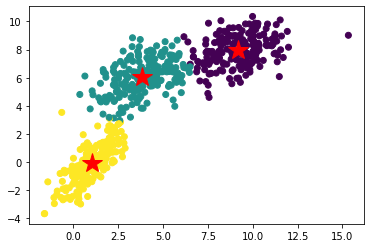

In [90]:
plt.scatter(X[:,0],X[:,1],c=C)
plt.plot(centroids[:,0],centroids[:,1],'r*',markersize=20)
plt.show()

In [30]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

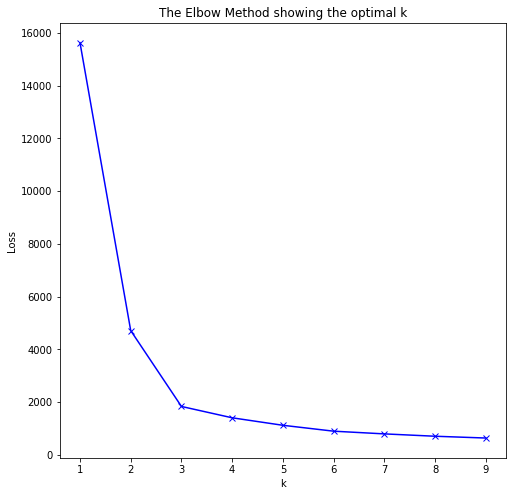

In [102]:
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [80]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [81]:
pred = kmeanModel.predict(X)

In [100]:
sample_test=np.array([3.0,3.0])
second_test=sample_test.reshape(1, -1)
print(second_test)
kmeanModel.predict(second_test)

[[3. 3.]]


array([2])